In [88]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /home/programmer/anaconda3/lib/python3.8/site-packages (0.11.2)


In [89]:
import pandas as pd
import seaborn as sns

from scipy.stats import norm # for scientific Computing
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

**Name:** _Marcel Damas_   
**E-Mail:** _marcel-spanien@hotmail.de_ 

## Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.
Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.
For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.



## Project goal 

we want to find ways to subdivide customers and find out which factors are increasingly leading to a churn and how to recognize them at an early stage in order to be able to take countermeasures at an early stage with various technologies. In our case, we would like to provide a basis for marketing with the analysis so that it can implement targeted marketing strategies in the areas that are important for this in order to prevent further migration to predefined areas.   

In short we want to keep our sources of income.
   
<a name="table_of_contents"></a> 

## Table of contents  

Instructions on completing the project   

**Step 1. Open the data file and study the general information** [click here](#Step_1)   

File path:
/datasets/gym_churn_us.csv [Download dataset](https://practicum.yandex.com/learn/practicum100-da/courses/e19aa27a-9c2b-4dd1-a49d-816250a49099/sprints/4620/topics/aec7d85a-39ab-45dc-b324-fdb0f2c38abb/lessons/d8815553-4917-4c7f-ba6d-c479113f7643/)

**Step 2. Carry out exploratory data analysis (EDA)** [click here](#Step_2)  

**Step 3. Build a model to predict user churn** [click here](#Step_3)   

**Step 4. Create user clusters** [click here](#Step_4) 

**Step 5. Come up with conclusions and basic recommendations on working with customers** [click here](#Step_5)  


<a name="Step_1"></a>  

**Step 1. Open the data file and study the general information** 

Back to the table of contents [click here](#table_of_contents)  

Download data set get an overview.

In [90]:
try:
    df = pd.read_csv('gym_churn_us.csv')
except:
    df = pd.read_csv('/datasets/gym_churn_us.csv')

In [91]:
print(df.shape)
display(df.head())

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<a name="Step_2"></a>  

**Step 2. Carry out exploratory data analysis (EDA)** 

Back to the table of contents [click here](#table_of_contents)

**Data Preprocessing**

Check whether data preprocessing is necessary and first analysis.

In [92]:
df.info()#no missing rows to remove

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [93]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


We only have numbers, values, no objects and no data seem to be missing, that looks very good for us at first.

In [94]:
df.groupby(['Churn']).sum().reset_index()

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,1499,2566,1570,1039,2656,16891,1364,88101,465671.955802,15527.0,13848,5951.109513,5959.944414
1,1,542,815,377,195,958,1834,285,28636,122102.955435,1764.0,1051,1564.969337,1108.262875


In [95]:
churn_mean = df.groupby(['Churn']).mean().reset_index()
churn_mean

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [96]:
print(df['Churn'].value_counts())

0    2939
1    1061
Name: Churn, dtype: int64


,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


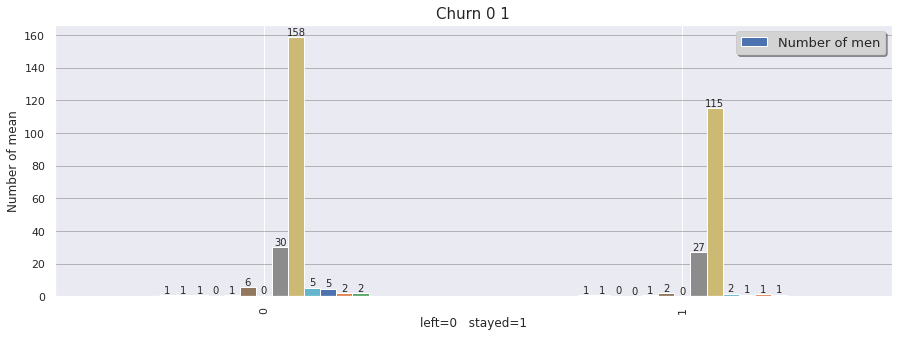

In [97]:
display(churn_mean)
churn_mean.set_index("Churn",inplace=True)
ax=churn_mean.plot.bar(figsize=(15,5))
plt.legend(loc="best")
plt.title("Churn 0 1",fontdict={'size':15});
plt.xlabel('left=0   stayed=1',fontdict={'size':12});
plt.ylabel("Number of mean",fontdict={'size':12});
plt.legend(['Number of men'],loc="upper right",prop = {'size' : 13}, shadow = True, facecolor = 'lightgray')
plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)

for item in ax.patches:
    height = item.get_height()
    ax.annotate('{:.0f}'.format(height),
            xy=(item.get_x() + item.get_width() / 2, height),
            xytext=(0, 0),  
            textcoords="offset points",
            ha='center', va='bottom',size='10')
plt.show()

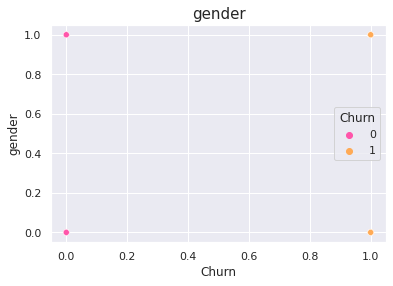

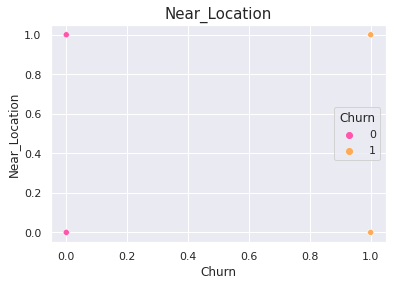

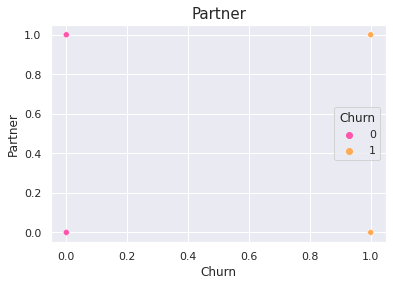

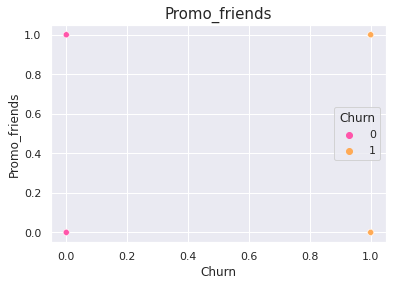

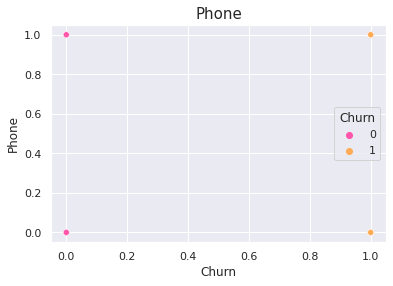

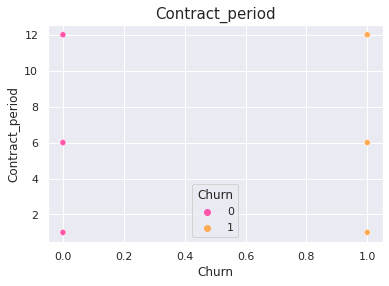

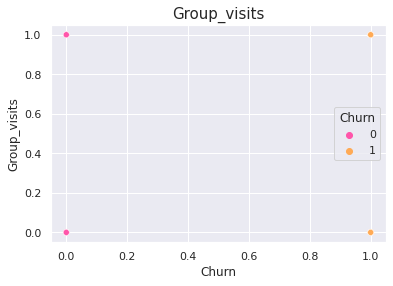

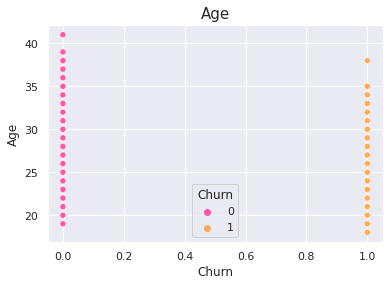

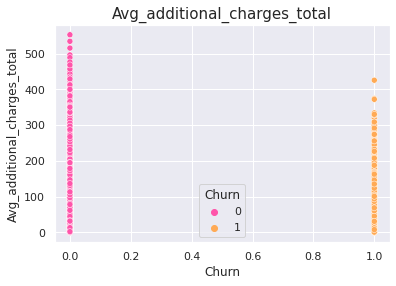

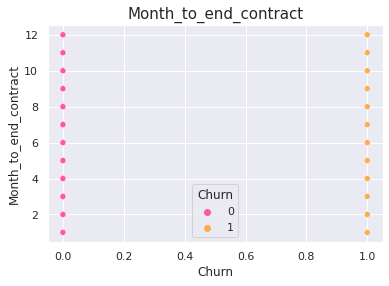

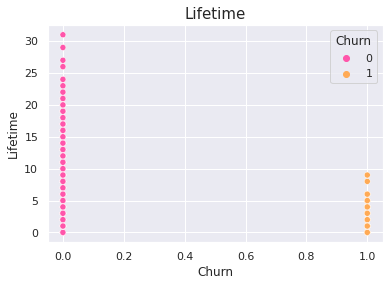

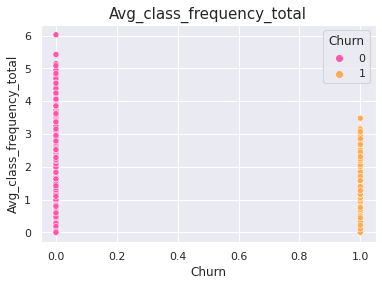

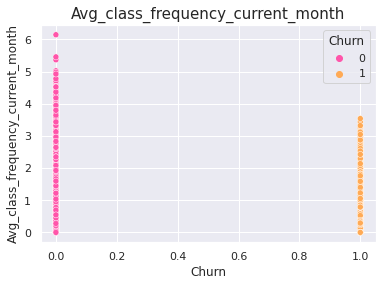

In [98]:
for col in df.drop('Churn',axis = 1).columns:
    sns.scatterplot(data=df, x="Churn", y=col, hue="Churn",palette = 'spring')
    plt.title(col,fontdict={'size':15})
    plt.show()

Since we are looking for a way to define why one group has left the studio, we will split two groups so that we can better define and fathom them. We see that there is a tendency to remain in the group (1) and there are no major outliers up to high extreme values as in the group (0). But we can use this data there are no extreme outliers.

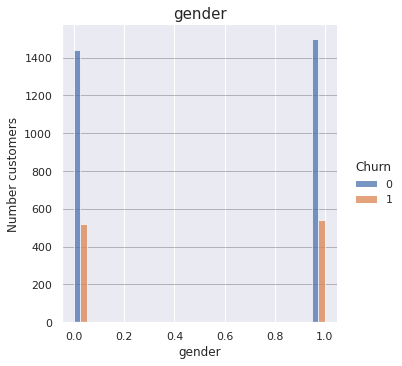

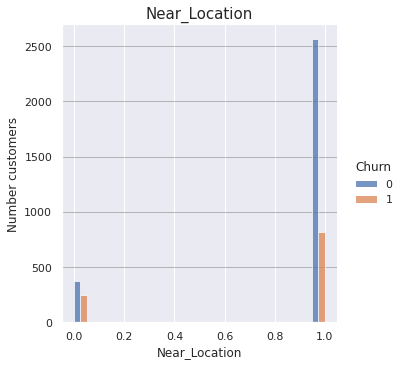

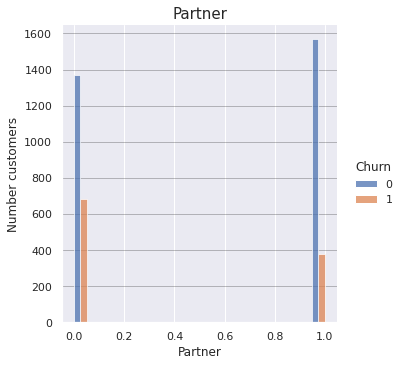

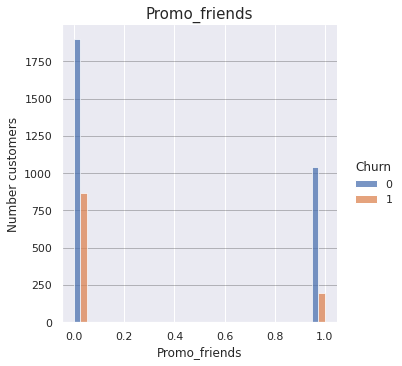

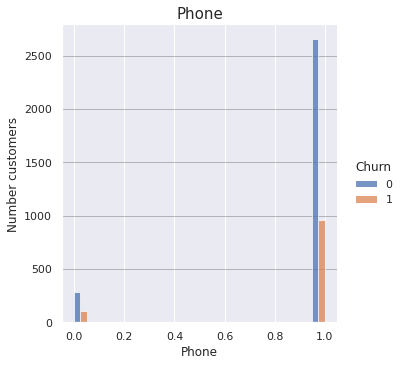

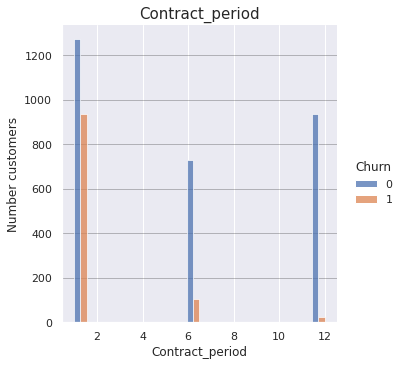

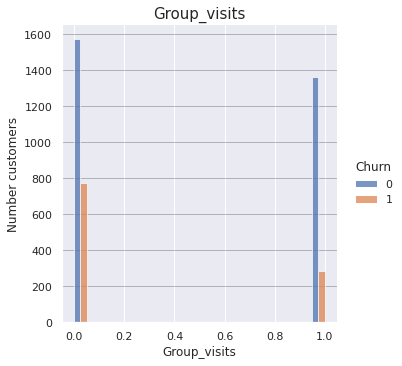

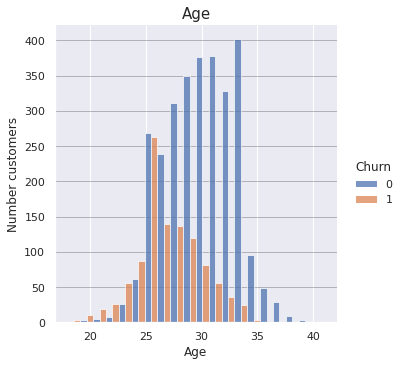

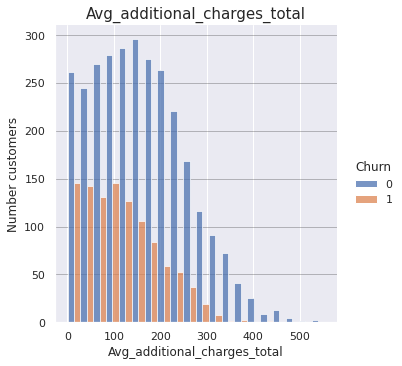

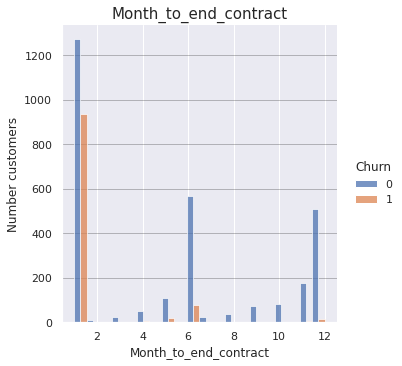

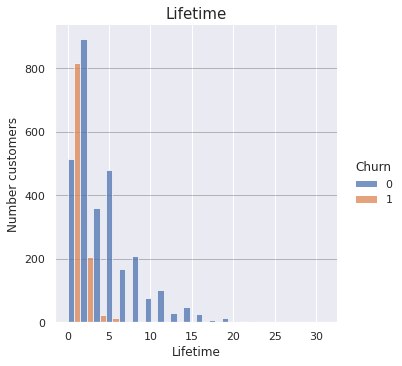

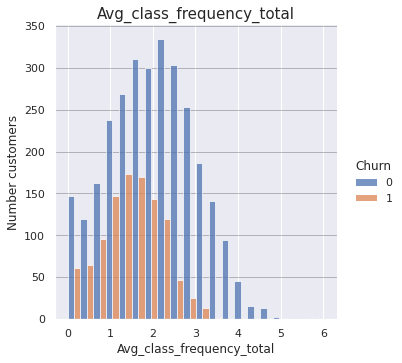

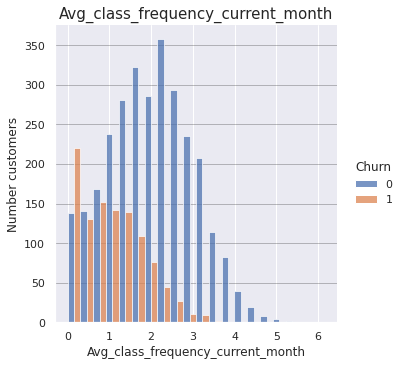

In [99]:
for col in df.drop('Churn',axis = 1).columns:
    sns.displot(data=df, x=col, hue="Churn", multiple="dodge", bins=20)  
    plt.title(col,fontdict={'size':15});
    plt.ylabel("Number customers",fontdict={'size':12});
    plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)    
    plt.show()

Short conclusion:  
Here we see the distribution histogram of the two churn rates from customers who have left us and those who have stayed with us. The 
1. sneak seems to have no effect. 
2. Near location the more customers who seem to have a long way to go tend to be less 1 but seem not to be dependent on it.
3. those who came to us through a partner seem to be less likely to quit.
4. for those who come through a promo friend, the termination rate is also less high.  

ect...


What is noticeable about the last one is that customers who come less often cancel <s>marriages</s> than customers who come to us more often. Here we should see that we encourage customers to come regularly.

In addition, we should concentrate on younger people when quitting because the older audience is less susceptible than the younger mas may be related to the financial situation; the younger ones who have not yet built up such a large fortune tend to look at what they are investing in and older people don't look so meticulously here but also have to do with sportiness and other reasons as they have to move because of study or job and are not yet in life like the older ones where everything is a bit more solid. The marketing department should create recruits for the younger ones. Especially the age 25/26 has an extreme churn rate.

In [100]:
left = df.query('Churn == 0') #we divide the data into the churn groups
left = left.drop('Churn',axis = 1)

stayed = df.query('Churn == 1')
stayed = stayed.drop('Churn',axis = 1)

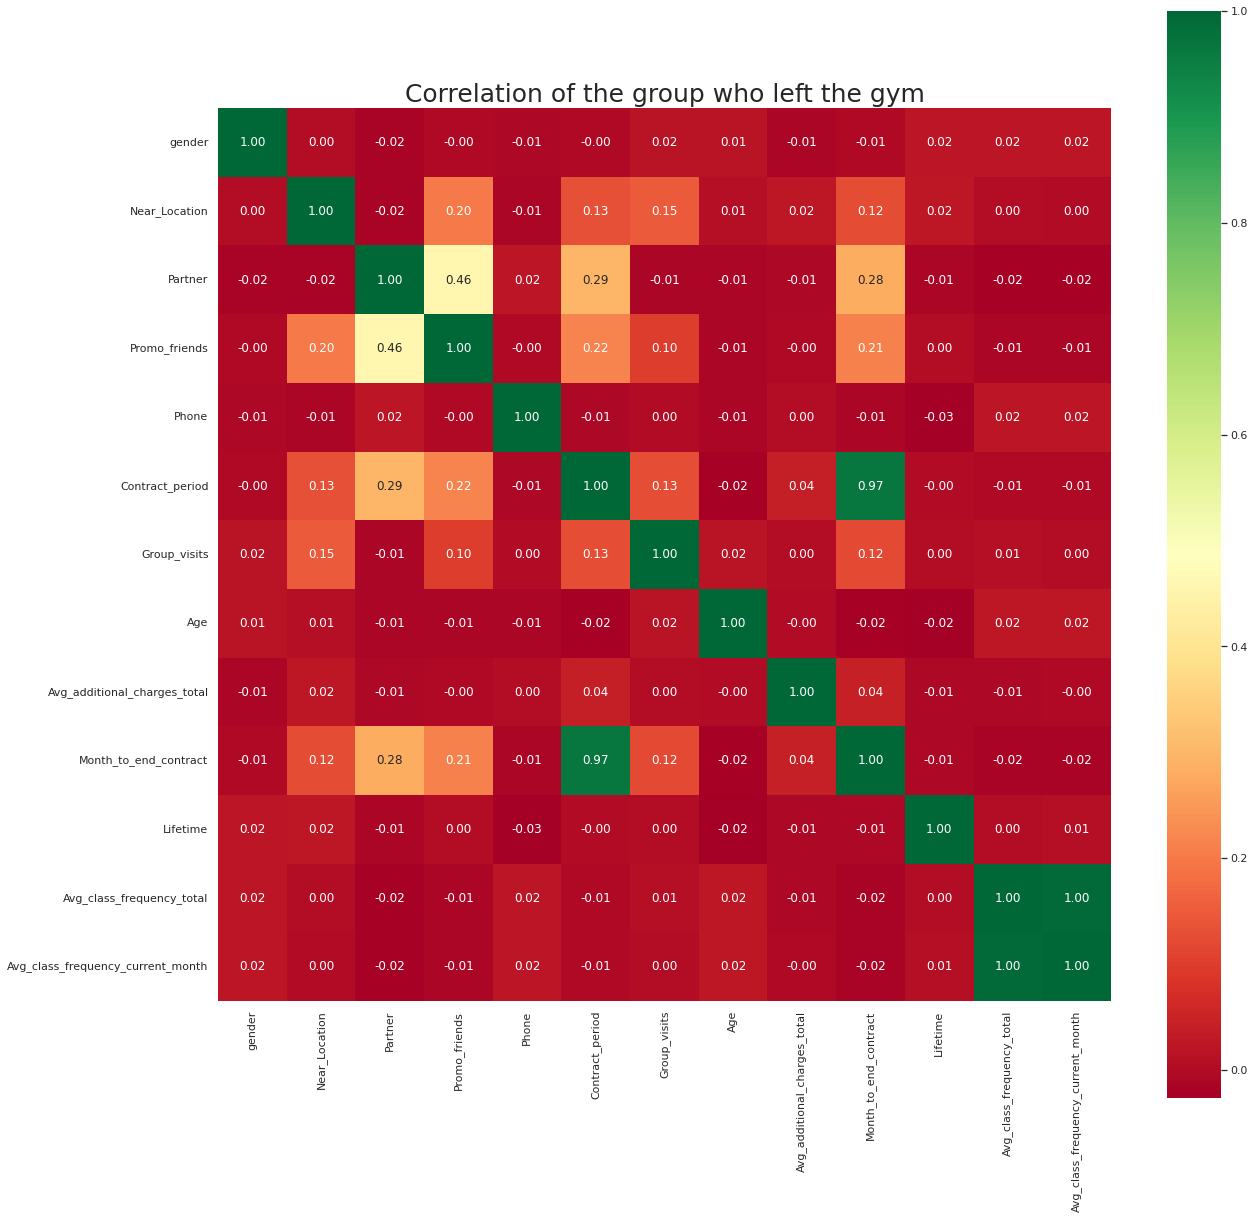

In [101]:
cm_left = left.corr()
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Correlation of the group who left the gym",fontdict={'size':25});
sns.set(font_scale = 1)
sns.heatmap(cm_left , annot = True, square=True,cmap = 'RdYlGn', fmt='.2f')
plt.show()

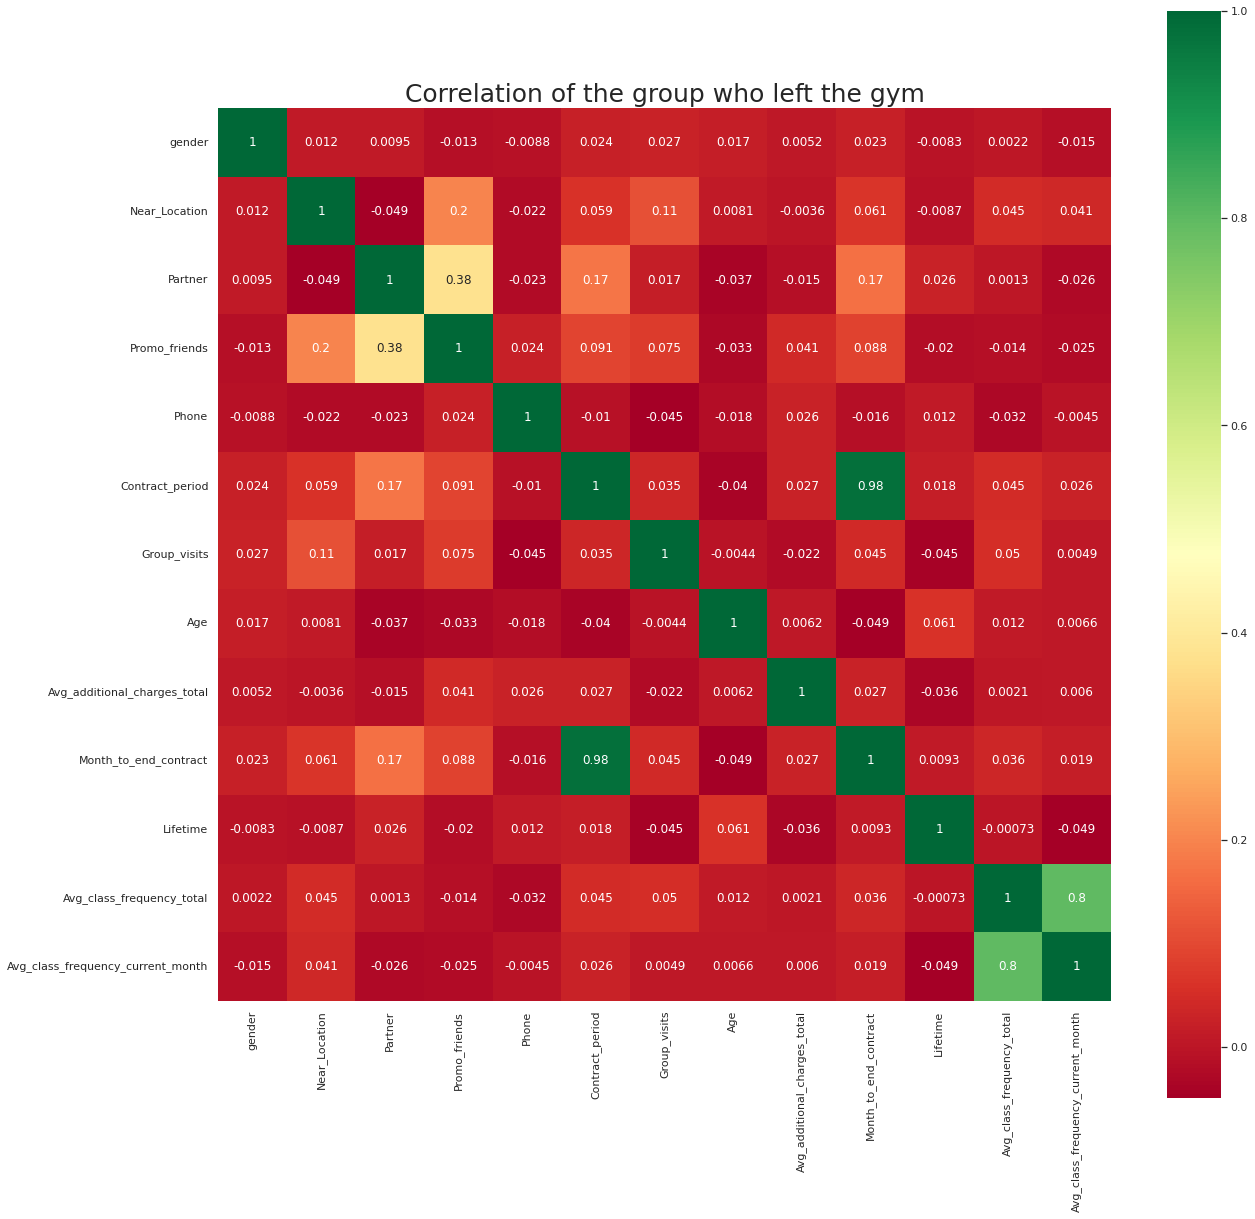

In [102]:
cm_stayed = stayed.corr()
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Correlation of the group who left the gym",fontdict={'size':25});
sns.set(font_scale = 1)
sns.heatmap(cm_stayed , annot = True,cmap = 'RdYlGn', square=True)
plt.show()

There could possibly be a connection User originally signed up for a "bring a friend" offer and stayed or left and from the average frequency of visits per week ('Avg Class Frequency Total') and the total amount spent on other services in the gym ('Avg Additional Charges Total') here one could assume that people who spend less have less money or pay more attention to what they are for Spend your money and whether it is worth it and thus maybe leave the studio if you are rarely there anyway.This applies to both heat maps.  
It is also apparent that there are no strong correlations, although the above-mentioned assumptions appear plausible when the values are more strongly correlated.So with the EDA we can guess where we're headed and the journey will lead us.

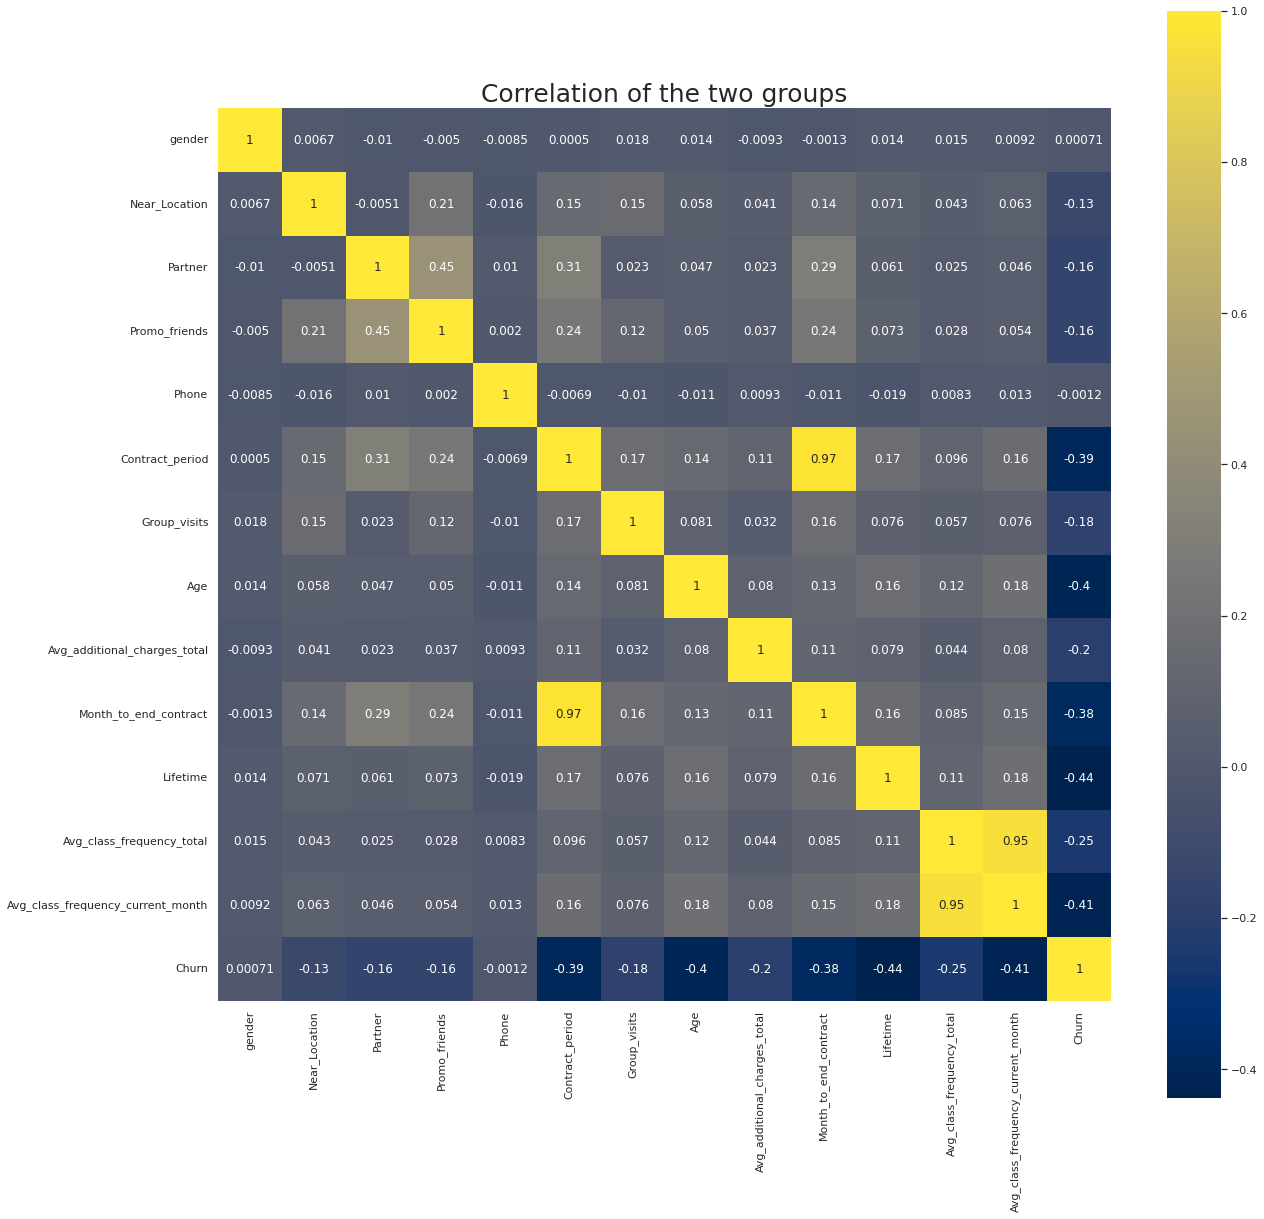

In [103]:
cm_df = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Correlation of the two groups",fontdict={'size':25});
sns.set(font_scale = 1)
sns.heatmap(cm_df , annot = True,cmap = 'cividis', square=True)
plt.show()

Here we see 3 correlations that catch the eye. Month to end contract - contract period then Avg class frequency current month - Avg class frequency total and partner - Promo friends these are certainly also a helpful reason why the probability of being informed is lower. Because you are mutually motivated and there is a good opportunity to meet and work on yourself at the same time.

<a name="Step_3"></a>  

**Step 3. Build a model to predict user churn**

Back to the table of contents [click here](#table_of_contents)

We now create the model.

In [104]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
print('Avg_class_frequency_current_month')
# print the mean and standard deviation of the 'Page total likes' feature
print('Mean for train', np.mean(X_train['Avg_class_frequency_current_month']))
print('Std for train', np.std(X_train['Avg_class_frequency_current_month']))

# standardize the data 
scaler = StandardScaler()
scaler.fit(X_train)# train the scaler on the train set using the fit method
X_train_st = scaler.transform(X_train)# standardize the train set using the transform scaler method
X_test_st = scaler.transform(X_test)#standardize the validation set using the transform scaler method

print('Mean for standardized train', np.mean(X_train_st[:,0]))
print('Std for standardized train', np.std(X_train_st[:,0]))
print('Mean for standardized test', np.mean(X_test_st[:,0]))
print('Std for standardized test', np.std(X_test_st[:,0]))

Avg_class_frequency_current_month
Mean for train 1.7644640740388124
Std for train 1.0562266907257398
Mean for standardized train 9.658940314238862e-17
Std for standardized train 0.9999999999999998
Mean for standardized test 0.027503094272168318
Std for standardized test 0.9992088841371862


In [106]:
#Logistic regression

# define the model's algorithm for the logistic regression model 
lr_model = LogisticRegression() 

# train the model
lr_model.fit(X_train, y_train)

# use the trained model to make forecasts
lr_predictions = lr_model.predict(X_test) 
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83


In [107]:
#Random forest

# define the model's algorithm for the random forest model 
rf_model = RandomForestClassifier() 

# train the model
rf_model.fit(X_train, y_train)

# use the trained model to make forecasts
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:,1] 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83


When comparing the two models, Random Forest performs better in this case and says the forecasts more precisely for the 20% of the data that are unknown to the computer. The accuracy and the precision are higher in random forest. That is why it is the conclusion here that it is better in this model to use random forest.

<a name="Step_4"></a>  

**Step 4. Create user clusters**

Back to the table of contents [click here](#table_of_contents)

In [108]:
#creating a scaler class object (normalizer)
sc = StandardScaler()
#trai the normalizer and transforming the dataset
x_sc = sc.fit_transform(X)
linked = linkage(x_sc, method = 'ward') 

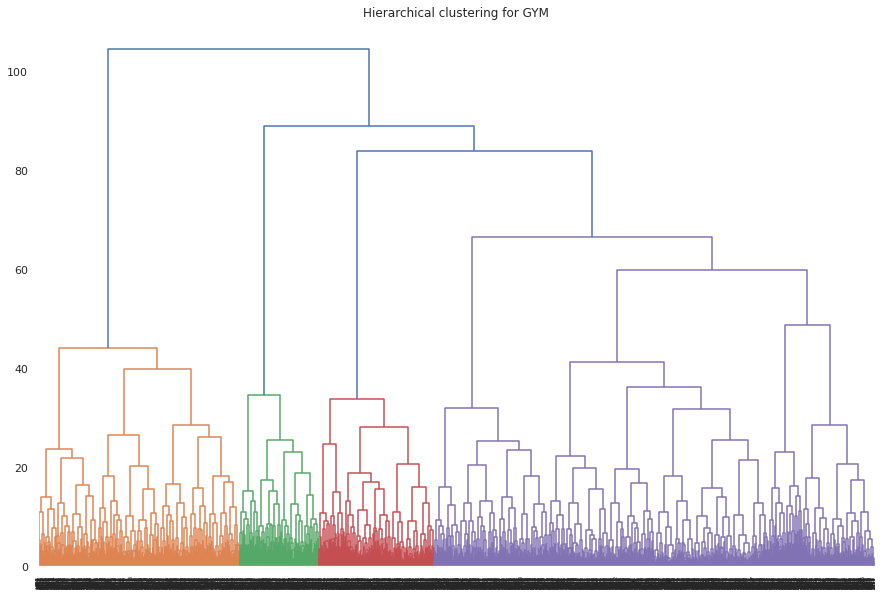

In [109]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

There are 4 different groups we can see this from the colors. The suggested optimal number of clusters 4 corresponds to the five different colors on the plot.Now we have determined the number of the clusters. Since we know that, we can use this to create KMeans clusters.

In [110]:
#snow set the number of clusters to 4
km = KMeans(n_clusters = 4, random_state= 0)  
# applying the algorithm to the data and forming a cluster vector
labels = km.fit_predict(x_sc) 
# store cluster labels in the field of our dataset
df['cluster_km'] = labels
# get the statistics of the mean feature values per cluster
df_group_mean = df.groupby(['cluster_km']).mean().reset_index()
df_group_mean.head()

,cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,1,0.541509,0.866038,0.334906,0.200000,1.0,2.383962,0.450943,29.998113,157.888187,2.221698,4.710377,2.712339,2.698750,0.092453
2,2,0.503238,0.940796,0.777983,0.573543,1.0,10.690102,0.532840,29.899167,161.051935,9.760407,4.721554,1.993064,1.984827,0.029602
3,3,0.489477,0.755601,0.386286,0.192804,1.0,1.899525,0.291921,28.044128,129.431049,1.806517,2.227427,1.202154,0.948054,0.562118


In [111]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

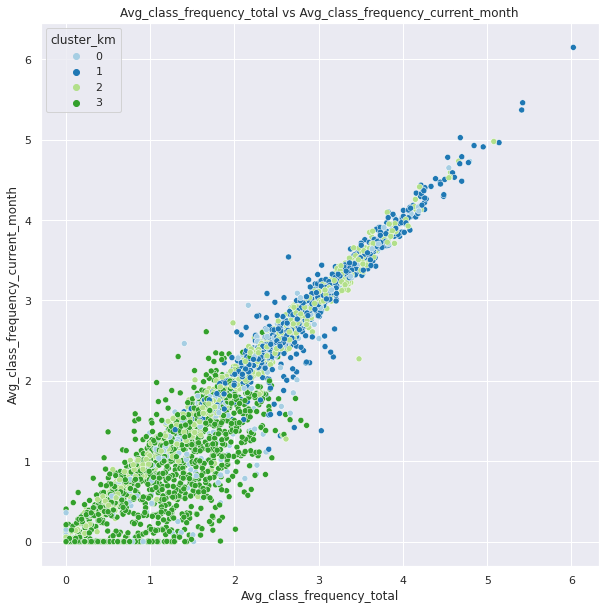

In [112]:
show_clusters_on_plot(df=df, 
                      y_name='Avg_class_frequency_current_month',
                      x_name='Avg_class_frequency_total', 
                      cluster_name='cluster_km')

Here we see that the two selected groups have a linear positive relationship and a relatively stronger relationship. The dark green values can be seen more at lower values, the brighter the higher up they are to be found. Here it is also noticeable that the spread of the green values is broader than that of the blue ones. In the case of the blue, on the other hand, it is the opposite; the dark blue values are located in the higher values along the y and y axes, the lighter and further down they are to be found.   

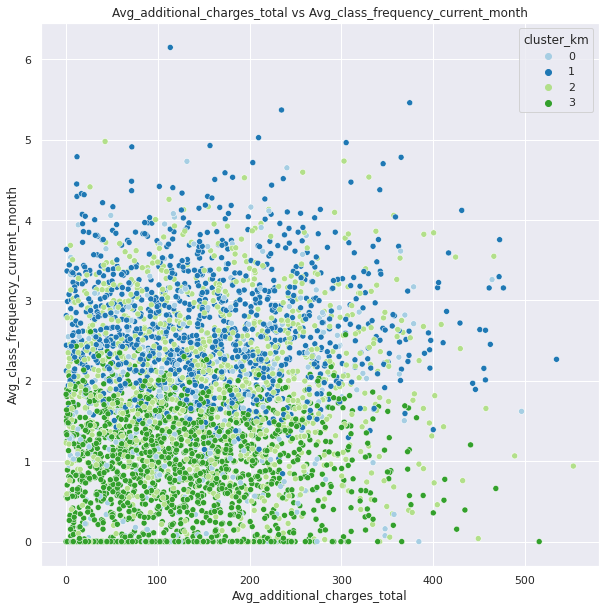

In [113]:
show_clusters_on_plot(df=df, 
                      y_name='Avg_class_frequency_current_month',
                      x_name='Avg_additional_charges_total', 
                      cluster_name='cluster_km')

With the second there is no relationship here the values are extremely scattered, with the blue values being higher along the y axis and the green ones being lower along the y axis.

In [114]:
# calculate the silhouette score for the clustering
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.13


The result looks relatively low, but there is no clear distinction between the groups either.

In [115]:
#divide the clusters
df_cluster0=df.query('cluster_km == 0')
df_cluster0 = df_cluster0.drop('cluster_km',axis = 1)

df_cluster1=df.query('cluster_km == 1')
df_cluster1 = df_cluster1.drop('cluster_km',axis = 1)

df_cluster2=df.query('cluster_km == 2')
df_cluster2 = df_cluster2.drop('cluster_km',axis = 1)

df_cluster3=df.query('cluster_km == 3')
df_cluster3 = df_cluster3.drop('cluster_km',axis = 1)

In [116]:
print('Total cluster 0:')
print()
df_cluster0_=df_cluster0['Churn'].value_counts().reset_index()
print(df_cluster0_.Churn.sum(axis=0))
print()
print('0=left 1=stay:')
print(df_cluster0['Churn'].value_counts())
print()
print('Churn rate:',283/386*100,'%')#I know it's not the right way
print('---------------------------------------------------')
print('total cluster 1:')
print()
df_cluster1_=df_cluster1['Churn'].value_counts().reset_index()
print(df_cluster1_.Churn.sum(axis=0))
print()
print('0=left 1=stay:')
print(df_cluster1['Churn'].value_counts())
print()
print('Churn rate:',651/1479*100,'%')#I know it's not the right way
print('---------------------------------------------------')
print('total cluster 2:')
print()
df_cluster2_=df_cluster2['Churn'].value_counts().reset_index()
print(df_cluster2_.Churn.sum(axis=0))
print()
print()
print('0=left 1=stay:')
print(df_cluster2['Churn'].value_counts())
print()
print('Churn rate:',959/1057*100,'%')#I know it's not the right way
print('---------------------------------------------------')
print('total cluster 3:')
print()
df_cluster3_=df_cluster3['Churn'].value_counts().reset_index()
print(df_cluster3_.Churn.sum(axis=0))
print()
print('0=left 1=stay:')
print(df_cluster3['Churn'].value_counts())
print()
print('Churn rate:',1046/1078*100,'%')#I know it's not the right way

Total cluster 0:

386

0=left 1=stay:
0    283
1    103
Name: Churn, dtype: int64

Churn rate: 73.31606217616581 %
---------------------------------------------------
total cluster 1:

1060

0=left 1=stay:
0    962
1     98
Name: Churn, dtype: int64

Churn rate: 44.01622718052739 %
---------------------------------------------------
total cluster 2:

1081


0=left 1=stay:
0    1049
1      32
Name: Churn, dtype: int64

Churn rate: 90.72847682119205 %
---------------------------------------------------
total cluster 3:

1473

0=left 1=stay:
1    828
0    645
Name: Churn, dtype: int64

Churn rate: 97.03153988868274 %


We see the behavior of stay and left in cluster 3, the worst.Only 32 customers from this cluster have stayed with us and most of the customers have left us in this cluster too in total 1046. The churn rate is also here: 97.03% the highest it is lowest for cluster 1 with 44.02 %.

In [117]:
df_cluster=df.groupby(['cluster_km','Lifetime','Churn']).mean().reset_index()
df_cluster

,cluster_km,Lifetime,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0,0,0.428571,0.857143,0.142857,0.285714,0.0,4.000000,0.428571,32.142857,113.042586,3.428571,2.072237,2.082629
1,0,0,1,0.541667,0.833333,0.270833,0.145833,0.0,1.208333,0.291667,26.937500,109.392776,1.208333,1.468740,1.101917
2,0,1,0,0.404762,0.833333,0.500000,0.261905,0.0,6.785714,0.500000,30.428571,146.963584,6.357143,1.820776,1.821742
3,0,1,1,0.531250,0.781250,0.531250,0.250000,0.0,2.937500,0.437500,27.656250,111.779287,2.812500,1.664726,1.043434
4,0,2,0,0.512195,0.951220,0.512195,0.365854,0.0,7.292683,0.560976,29.609756,166.732911,6.634146,1.663077,1.658726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,3,15,0,0.750000,0.750000,0.000000,0.000000,1.0,1.000000,0.000000,29.500000,126.043259,1.000000,0.816041,0.815522
114,3,16,0,0.000000,1.000000,0.000000,0.000000,1.0,2.666667,0.000000,27.333333,121.150274,2.666667,0.156217,0.130571
115,3,17,0,0.500000,1.000000,0.500000,0.500000,1.0,1.000000,0.500000,30.000000,221.922708,1.000000,0.000000,0.003616
116,3,22,0,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,29.000000,98.960247,1.000000,0.447117,0.567083


In [118]:
#divide the clusters
df_cluster0_=df_cluster.query('cluster_km == 0')
df_cluster0_ = df_cluster0_.drop('cluster_km',axis = 1)

df_cluster1_=df_cluster.query('cluster_km == 1')
df_cluster1_ = df_cluster1_.drop('cluster_km',axis = 1)

df_cluster2_=df_cluster.query('cluster_km == 2')
df_cluster2_ = df_cluster2_.drop('cluster_km',axis = 1)

df_cluster3_=df_cluster.query('cluster_km == 3')
df_cluster3_ = df_cluster3_.drop('cluster_km',axis = 1)

In [119]:
df_cluster['Phone'].value_counts()
df_cluster0_['Phone'].value_counts()

0.0    28
Name: Phone, dtype: int64

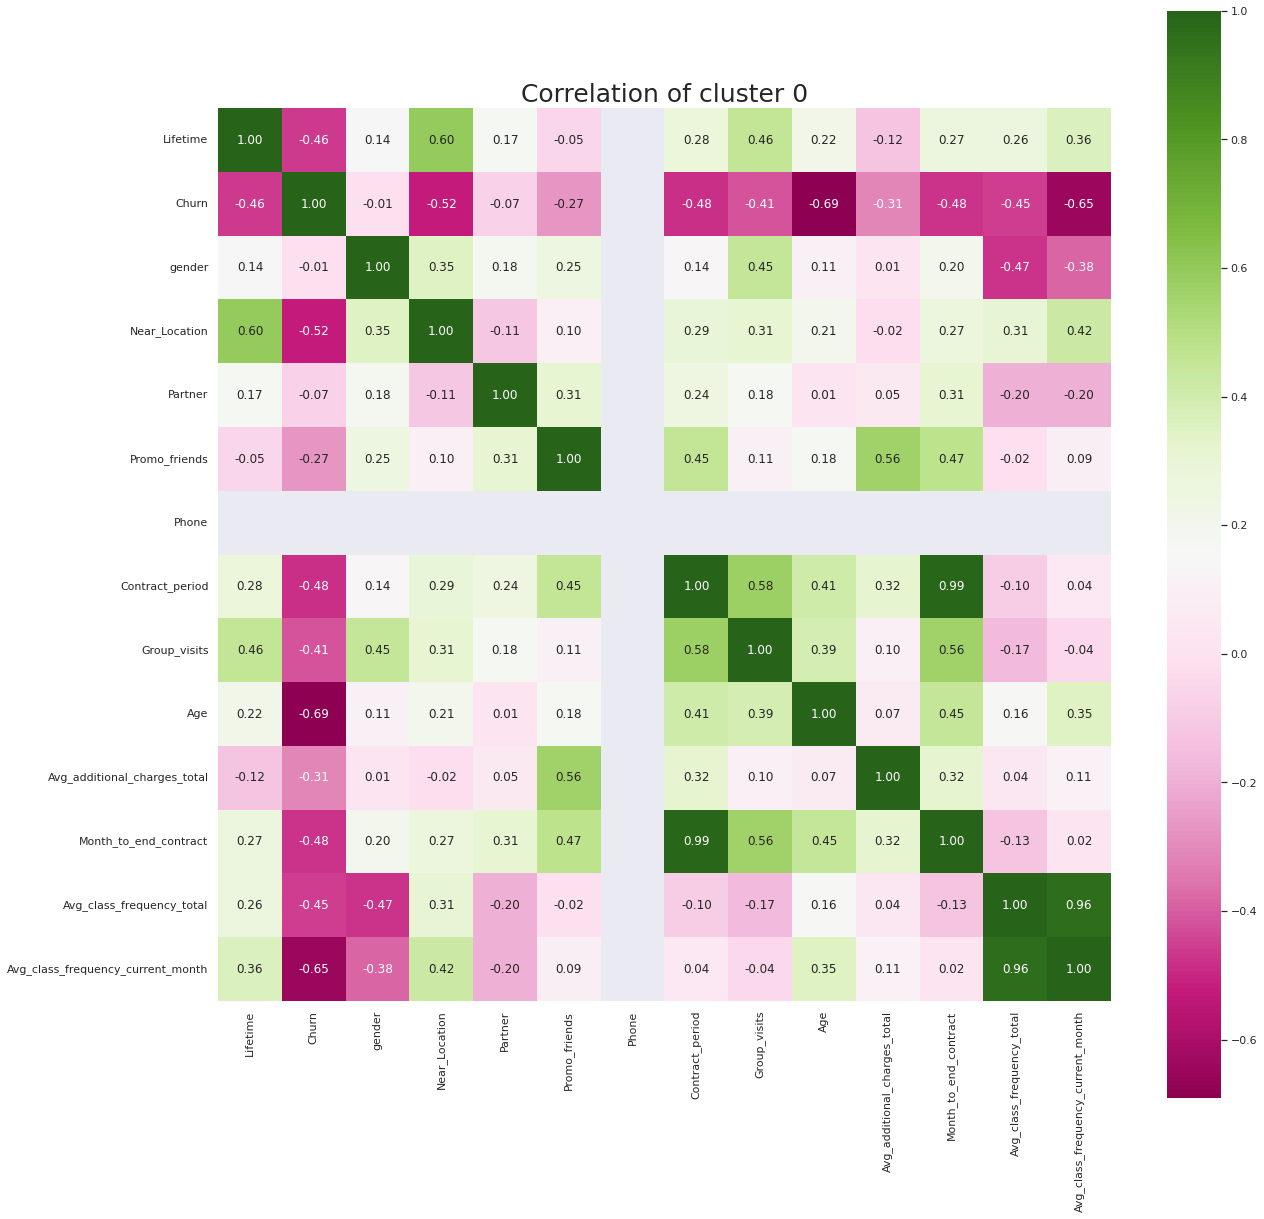

In [120]:
cm_df_cluster0_ = df_cluster0_.corr()
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Correlation of cluster 0",fontdict={'size':25});
sns.set(font_scale = 1)
sns.heatmap(cm_df_cluster0_ , annot = True, square=True, cmap = 'PiYG', fmt='.2f')
plt.show()

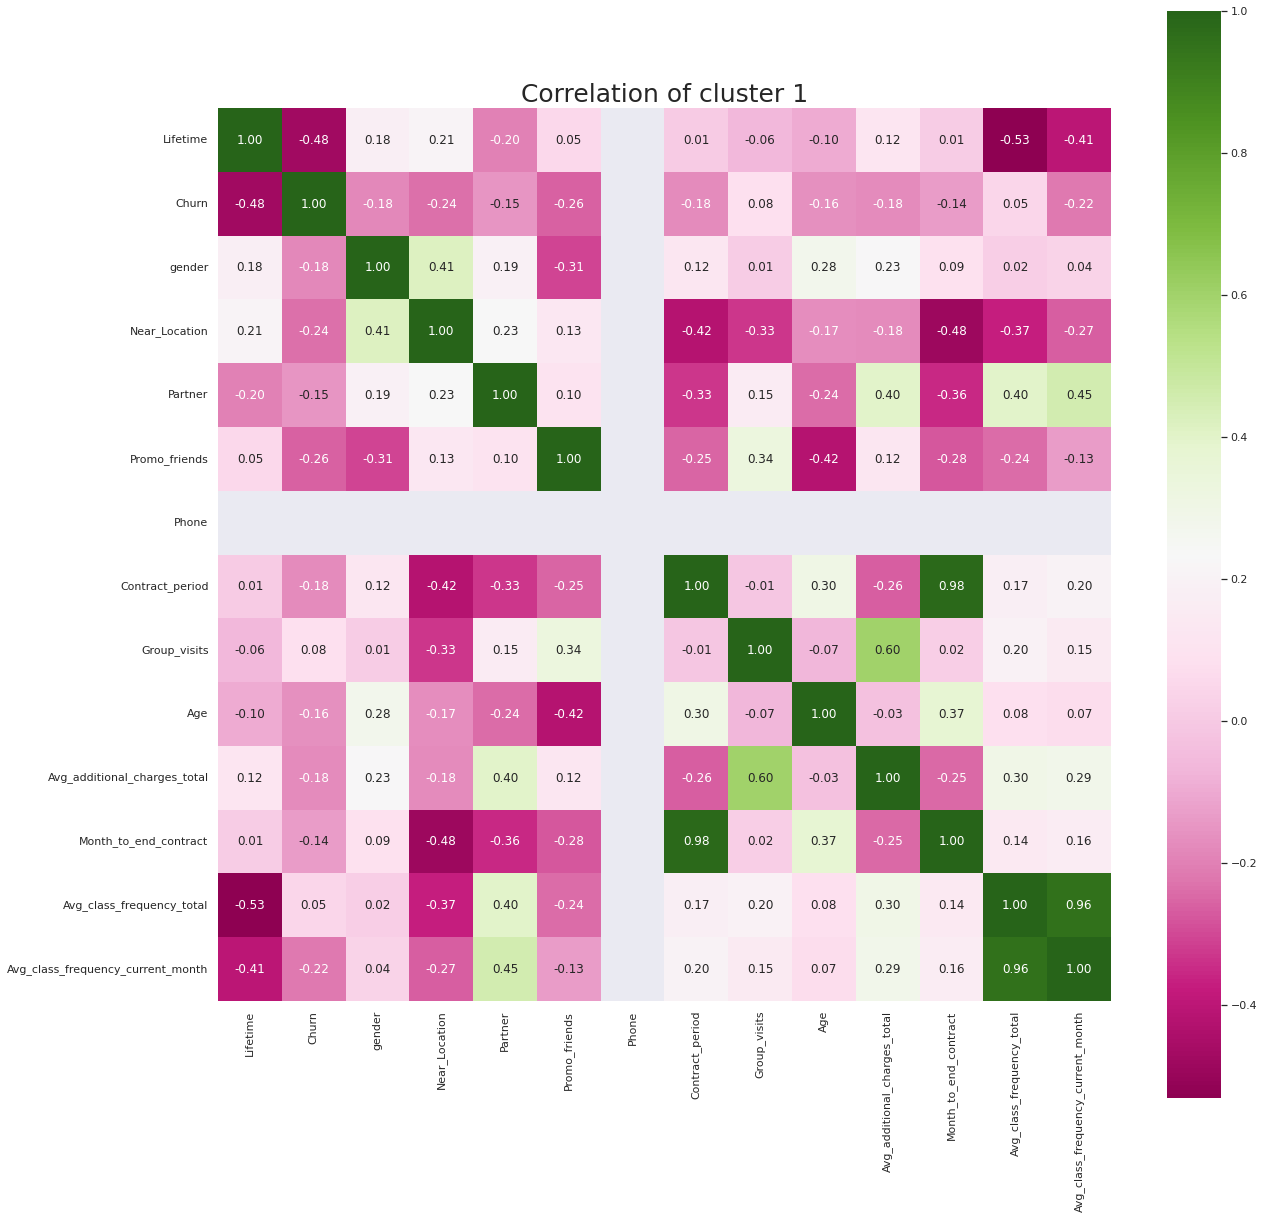

In [121]:
cm_df_cluster1_ = df_cluster1_.corr()
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Correlation of cluster 1",fontdict={'size':25});
sns.set(font_scale = 1)
sns.heatmap(cm_df_cluster1_ , annot = True, square=True, cmap = 'PiYG', fmt='.2f')
plt.show()

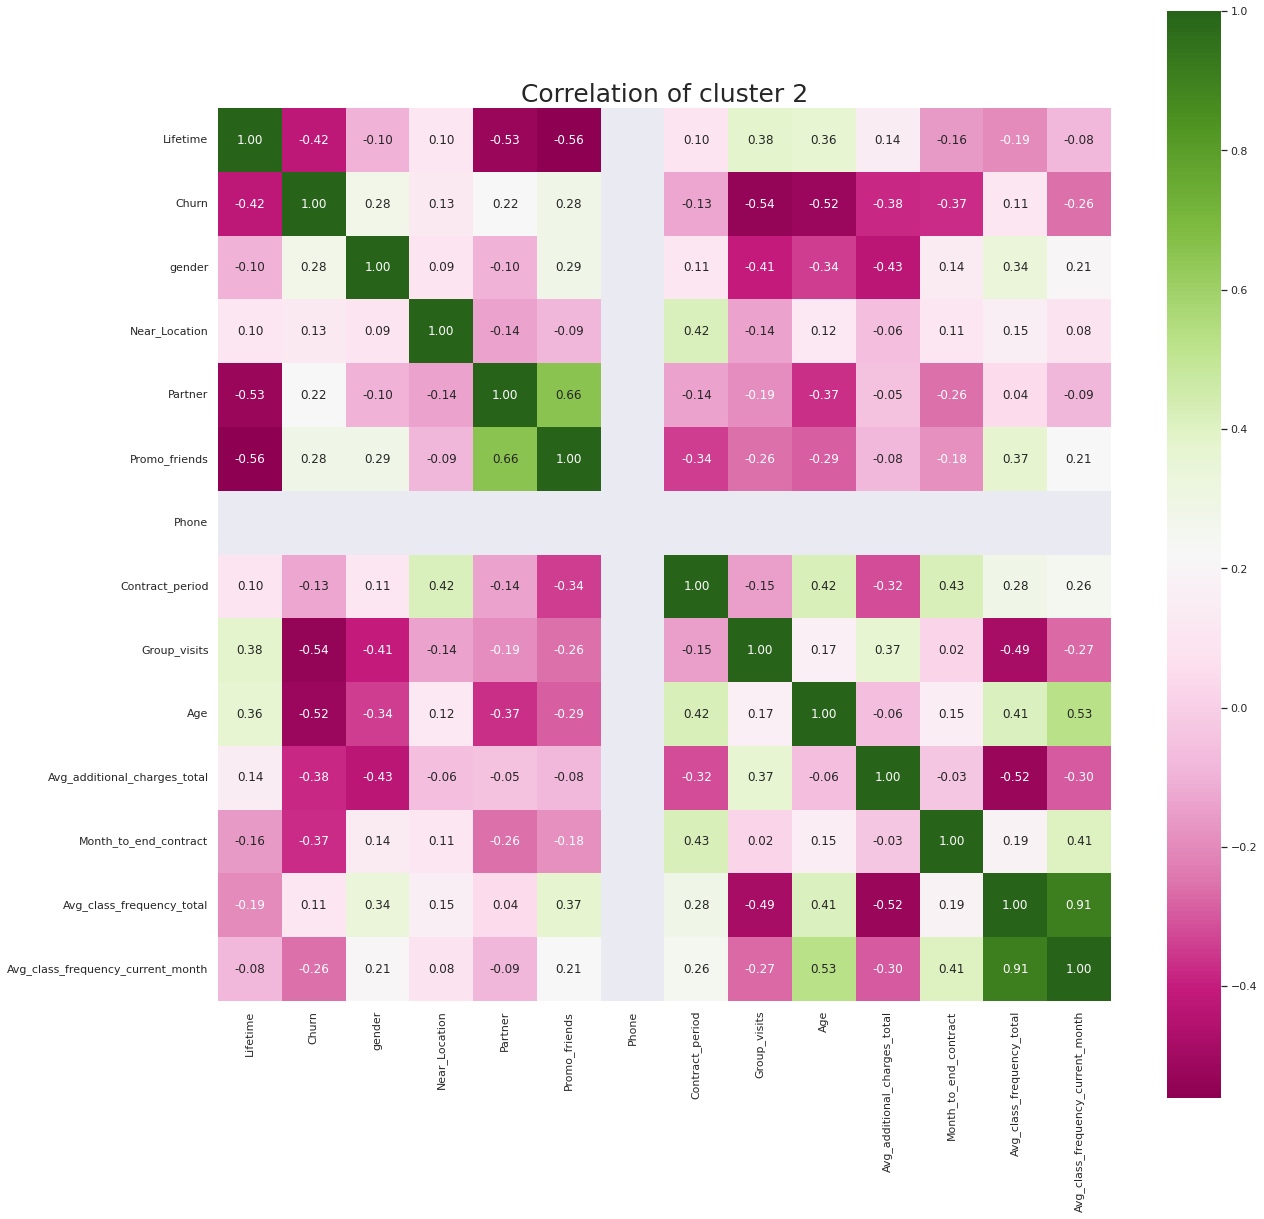

In [122]:
cm_df_cluster2_ = df_cluster2_.corr()
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Correlation of cluster 2",fontdict={'size':25});
sns.set(font_scale = 1)
sns.heatmap(cm_df_cluster2_ , annot = True, square=True,cmap = 'PiYG', fmt='.2f')
plt.show()

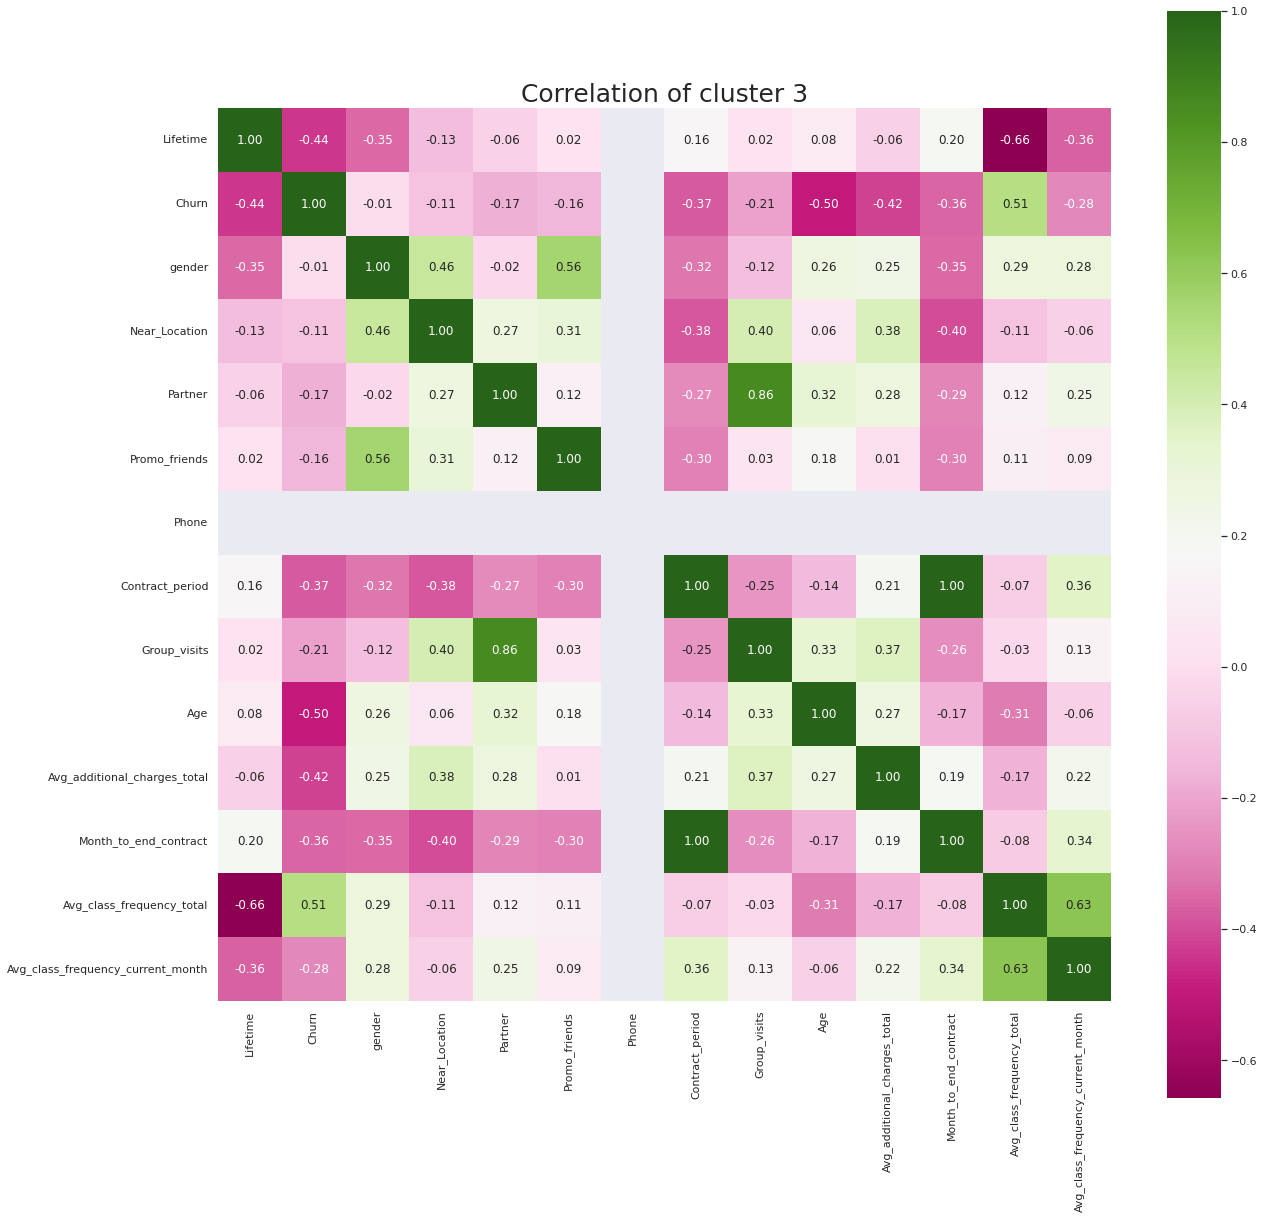

In [123]:
cm_df_cluster3_ = df_cluster3_.corr()
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Correlation of cluster 3",fontdict={'size':25});
sns.set(font_scale = 1)
sns.heatmap(cm_df_cluster3_ , annot = True, square=True,cmap = 'PiYG', fmt='.2f')
plt.show()

The contract period and the month to end the contract seem to play an important role because there is a high level of correlation here.  
There is also a strong correlation between the average number of visits per week over the life of the customer and the average number of visits per week in the previous month, but this is also clear because frequency total includes the whole week in the previous month.

Cluster 0:


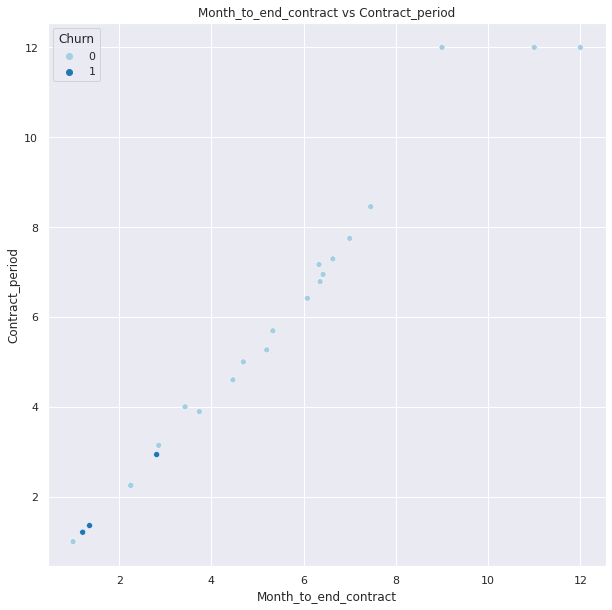

In [124]:
print('Cluster 0:')
plt.figure(figsize = (10,10))
sns.scatterplot(df_cluster0_['Month_to_end_contract'], df_cluster0_['Contract_period'],
          hue = df_cluster0_['Churn'], palette = 'Paired'
       )
plt.title('{} vs {}'.format('Month_to_end_contract', 'Contract_period'))
plt.show()

Cluster 1:


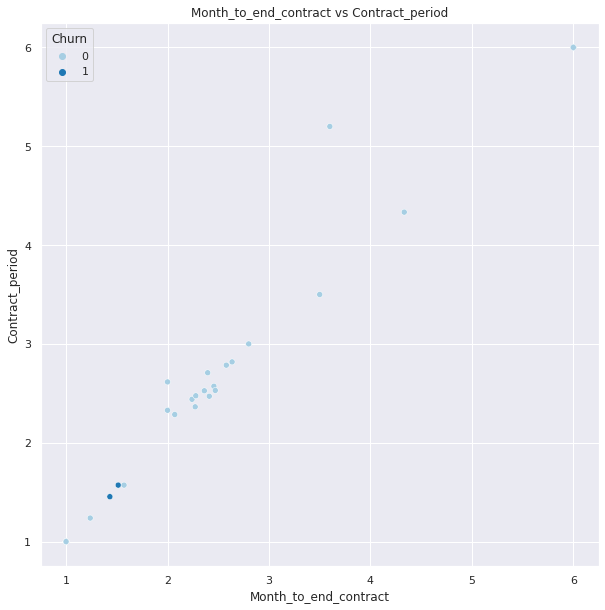

In [125]:
print('Cluster 1:')
plt.figure(figsize = (10,10))
sns.scatterplot(df_cluster1_['Month_to_end_contract'], df_cluster1_['Contract_period'],
          hue = df_cluster1_['Churn'], palette = 'Paired'
       )
plt.title('{} vs {}'.format('Month_to_end_contract', 'Contract_period'))
plt.show()

Cluster 2:


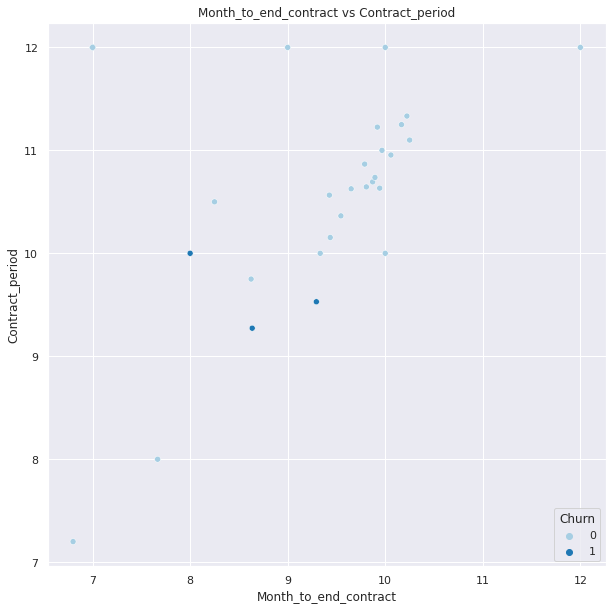

In [126]:
print('Cluster 2:')
plt.figure(figsize = (10,10))
sns.scatterplot(df_cluster2_['Month_to_end_contract'], df_cluster2_['Contract_period'],
          hue = df_cluster2_['Churn'], palette = 'Paired'
       )
plt.title('{} vs {}'.format('Month_to_end_contract', 'Contract_period'))
plt.show()

Cluster 3:


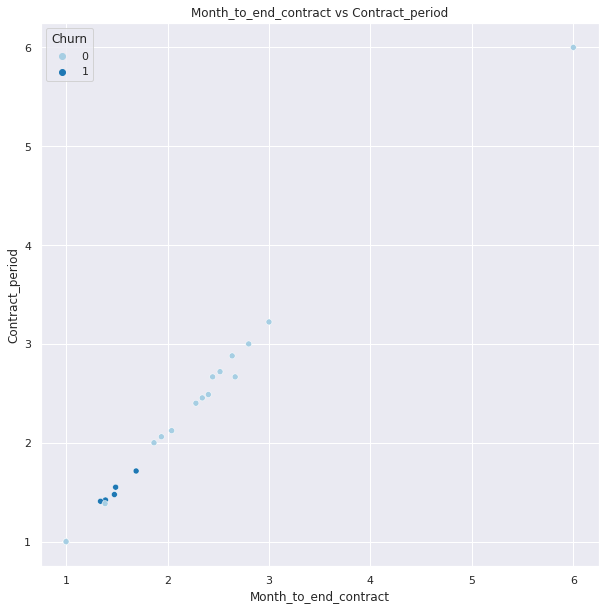

In [127]:
print('Cluster 3:')
plt.figure(figsize = (10,10))
sns.scatterplot(df_cluster3_['Month_to_end_contract'], df_cluster3_['Contract_period'],
          hue = df_cluster3_['Churn'], palette = 'Paired'
       )
plt.title('{} vs {}'.format('Month_to_end_contract', 'Contract_period'))
plt.show()

We can state that those who have a shorter contract period terminate less often than people who have a long period of trust. It is only different in the 3 cluster are these outliers or is there a reason for this we need to find out more about the individual customers here.

I misinterpreted 0 and 1 ... since we now know that 1 means to terminate short contracts faster, it is interesting to find out how long the contracts should be offered to avoid this.

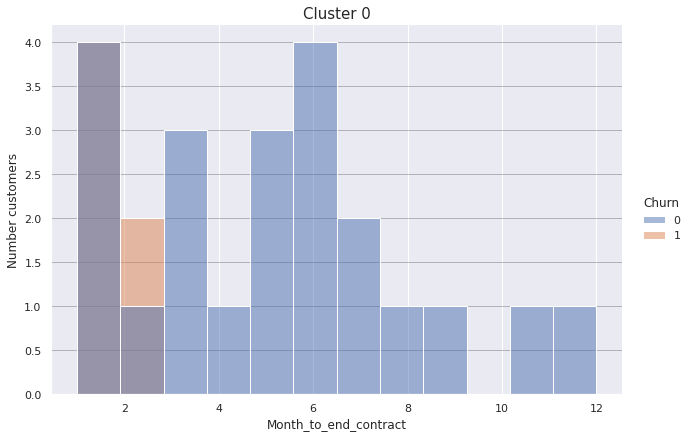

In [128]:
sns.displot(data=df_cluster0_, x='Month_to_end_contract', hue="Churn",
            bins=12, height=6, aspect=1.5)
plt.title('Cluster 0',fontdict={'size':15});
plt.ylabel("Number customers",fontdict={'size':12});
plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)    
plt.show()


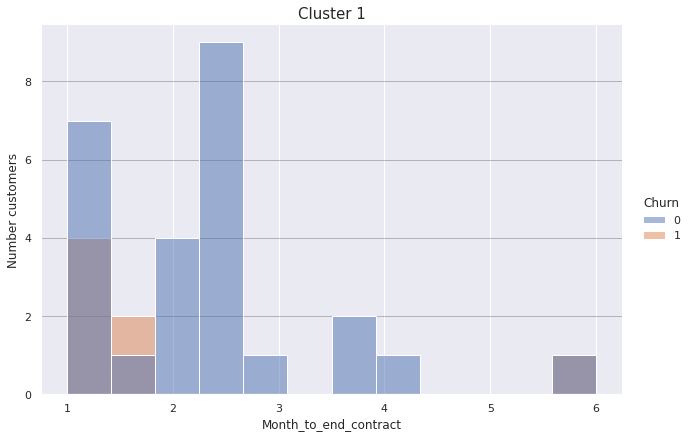

In [129]:
sns.displot(data=df_cluster1_, x='Month_to_end_contract', hue="Churn",
            bins=12, height=6, aspect=1.5)
plt.title('Cluster 1',fontdict={'size':15});
plt.ylabel("Number customers",fontdict={'size':12});
plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)    
plt.show()


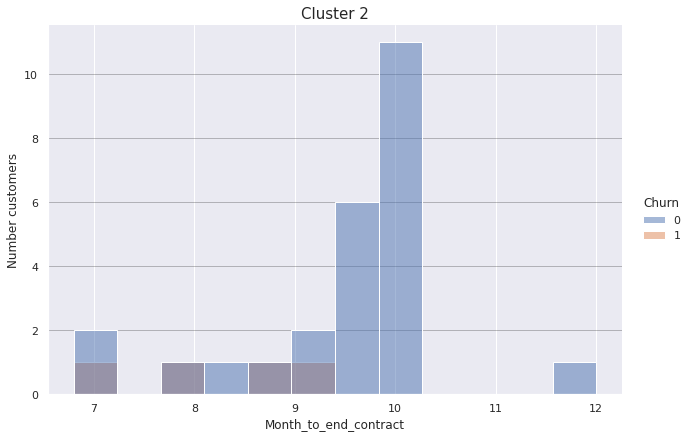

In [130]:

sns.displot(data=df_cluster2_, x='Month_to_end_contract', hue="Churn",
            bins=12, height=6, aspect=1.5)
plt.title('Cluster 2',fontdict={'size':15});
plt.ylabel("Number customers",fontdict={'size':12});
plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)    
plt.show()


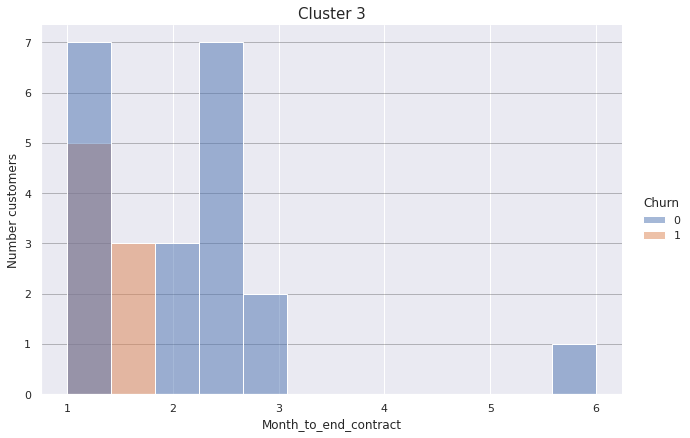

In [131]:
sns.displot(data=df_cluster3_, x='Month_to_end_contract', hue="Churn",
            bins=12, height=6, aspect=1.5)

plt.title('Cluster 3',fontdict={'size':15});
plt.ylabel("Number customers",fontdict={'size':12});
plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)    
plt.show()

The first 3 clusters, the termination rate is only high at the beginning, at cluster 3 the terminations beyond the 9 months. If we wanted to be on the safe side we have to persuade customers to enter into contracts for nine months or more, we should take a look at the other 3 clusters, here with 2922 almost 3 times as many customers are represented and also a significantly higher number of cancellations from 852 to 32 customers as in the 3 cluster.  
Here we could avoid these high layoffs by signing up for 3 months or more, especially the 1 cluster is very important to us because most of the customers are here who leave us 651 which is significantly higher than in all 3 andes combined. Here they leave us in the first 2 months. Marketing should follow up on this and look for a way to avoid this without us having fewer registrations, as it could also be possible that you do not conclude with us at all if we do not have the opportunity to conclude short, flexible contracts.

But if we make the offers for long contracts so tempting that it hardly makes sense to conclude short ones but keep the short ones, we can maybe manage without losing those who want to remain flexible and even change their minds to longer ones.

<a name="Step_5"></a>  

**Step 5. Come up with conclusions and basic recommendations on working with customers** 


Back to the table of contents [click here](#table_of_contents)

**Conclusion**  

As already mentioned and repeated above:
What is noticeable about the last one is that customers who come less often cancel marriages than customers who come to us more often. Here we should see that we encourage customers to come regularly.

In addition, we should concentrate on younger people when quitting because the older audience is less susceptible than the younger mas may be related to the financial situation; the younger ones who have not yet built up such a large fortune tend to look at what they are investing in and older people don't look so meticulously here but also have to do with sportiness and other reasons as they have to move because of study or job and are not yet in life like the older ones where everything is a bit more solid. The marketing department should create recruits for the younger ones. Especially the age 25/26 has an extreme churn rate.

As repeated above in the last conclusion:
The first 3 clusters, the termination rate is only high at the beginning, at cluster 3 the terminations beyond the 9 months. If we wanted to be on the safe side we have to persuade customers to enter into contracts for nine months or more, we should take a look at the other 3 clusters, here with 2922 almost 3 times as many customers are represented and also a significantly higher number of cancellations from 852 to 32 customers as in the 3 cluster.
Here we could avoid these high layoffs by signing up for 3 months or more, especially the 1 cluster is very important to us because most of the customers are here who leave us 651 which is significantly higher than in all 3 andes combined. Here they leave us in the first 2 months. Marketing should follow up on this and look for a way to avoid this without us having fewer registrations, as it could also be possible that you do not conclude with us at all if we do not have the opportunity to conclude short, flexible contracts.

But if we make the offers for long contracts so tempting that it hardly makes sense to conclude short ones but keep the short ones, we can maybe manage without losing those who want to remain flexible and even change their minds to longer ones.

Conclusion of the data as we were able to analyze we found out that there are different churn rates for the individual clusters that of the 3 cluster is the highest, followed by the 2, the 1 has the lowest churn rate.  
But why is it like that or better said what can we see where the differences are. We can say that there is more correlation in the clusters with a lower churn rate than in the clusters with a higher churn rate. The contract period and the month to end the contract seem to play an important role because there is a high level of correlation here. We can state that those who have a shorter contract period terminate less often than people who have a long period of trust. here we should definitely investigate again what the reason for this is.

important that we take a close look at the metrics and pay attention to the first signs of recognition, which periods are more affected, which age groups, gender, etc. and here we see whether we can draw conclusions from the extreme values that can help us. Despite it we cannot always say exactly what the reasons are and draw conclusions from these values for more conclusions we would need more information on which we can draw further conclusions, therefore we should do further market research based on our previous knowledge that we have so far in order to be able to target advertising even more. How can we define the 4 groups more precisely. We also have to see when it is no longer in our hands and further investments are pointless. What are the things that scares this group off or causes them to quit what are their reasons for moving what are their wishes and goals. What is different. How do we make it easier for you to achieve greater success in realizing your wishes and goals from the customers who stay? The goal behind it is to bind them to us more strongly. What are the reasons for the declining motivation. (Willpower is limited) How can we help them to get more of it in relation to us. In itself, exercise contributes to more energy. What is the motivation killer here? What can we improve here? What leverage does it take to transform the willpower of demotivation into motivation in the groups. How can the willpower to weaken be terminated. Each person is individual, but perhaps more insights can be gained, which in general are important in order to be able to take better countermeasures for a better bottom line. Somewhere are borders where exactly are they.